## The impact of population divergence on genealogies at two loci

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import sys
import os
sys.path.append('../../src/')
from coal_cov import *
from plot_utils import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.autolayout'] = True
plt.rcParams['pdf.fonttype'] = 3


# Making the relevant figure directories that we want
main_figdir = '../../plots/two_locus_stats/div/'
supp_figdir = '../../plots/supp_figs/two_locus_stats/div/'
os.makedirs(main_figdir, exist_ok=True)
os.makedirs(supp_figdir, exist_ok=True)

## Correlation in Branch Length

In [3]:
def se_cov(x,y, unbiased=False):
    """ compute the standard error of a covariance (using Richardsons formula) """
    assert(x.shape[0] == y.shape[0])
    n = x.shape[0]
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    mean_diff_x = (x - mu_x)
    mean_diff_y = (y - mu_y)
    mu_22 = np.mean((mean_diff_x**2) * (mean_diff_y**2))
    mu_11 = np.mean(mean_diff_x * mean_diff_y)
    mu_20 = np.var(x)
    mu_02 = np.var(y)
    var_cov_xy = (n-1)**2/(n**3)*(mu_22 - mu_11**2) + (n-1)/(n**3)*(mu_02 * mu_20 - mu_11**2)
    if unbiased:
        var_cov_xy  = var_cov_xy * ((n/(n-1))**2)
    return(var_cov_xy)

def se_corr(x,y):
    """ Calculate standard error of correlation  """
    assert(x.shape[0] == y.shape[0])
    r = np.corrcoef(x,y)[0,1]
    N = x.shape[0]
    se_r = np.sqrt((1. - r**2)/(N-2))
    return(se_r)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 130.21it/s]


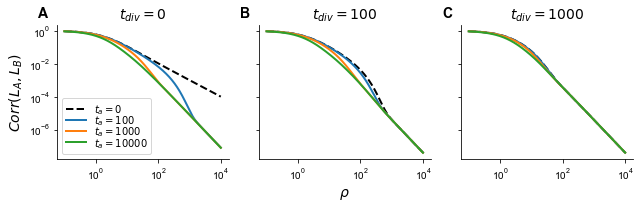

In [4]:
rhos2_t = 10**np.linspace(-1,4, 1000)
tdivs = np.array([0.0, 0.01, 0.1])
ntdiv = tdivs.size
ta = 0.01


f, ax = plt.subplots(1,ntdiv, figsize=(3*ntdiv,3), sharey=True)
ta = 0.01
Ne = 1e4
for j in tqdm(range(ntdiv)):
    tdiv = tdivs[j]
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrLALB(rhos2_t, 0.0, tdiv), linestyle='--', 
            lw=2, color='black', label=r'$t_a = 0$')
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrLALB(rhos2_t, ta, tdiv), 
              lw=2, label=r'$t_a = %d$' % (ta*Ne))
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrLALB(rhos2_t, ta*10, tdiv), 
              lw=2, label=r'$t_a = %d$' % (ta*10*Ne))
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrLALB(rhos2_t, ta*100, tdiv), 
            lw=2, label=r'$t_a = %d$' % (ta*100*Ne))
    ax[j].set_title(r'$t_{div} = %d$' % (tdiv*Ne), fontsize=14)
    debox(ax[j]);

label_multipanel(ax, ['A','B','C'], fontsize=14, fontweight='bold', va='top', ha='right')     

ax[1].set_xlabel(r'$\rho$', fontsize=14)
ax[0].set_ylabel(r'$Corr(L_A, L_B)$', fontsize=14)
ax[0].legend(fontsize=10, labelspacing=-0.25)
plt.savefig(supp_figdir + 'theory_corr_lA_lB.pdf', dpi=300, bbox_inches='tight')

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 116.80it/s]


CPU times: user 1.19 s, sys: 70 ms, total: 1.26 s
Wall time: 800 ms


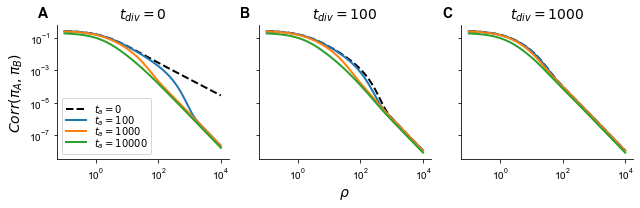

In [5]:
%%time
theta = 0.4

rhos2_t = 10**np.linspace(-1,4, 1000)
tdivs = np.array([0.0, 0.01, 0.1])
ntdiv = tdivs.size
ta = 0.001

fig, ax = plt.subplots(1,ntdiv, figsize=(3*ntdiv,3), sharey=True)
ta = 0.01
Ne = 1e4
for j in tqdm(range(ntdiv)):
    tdiv = tdivs[j]
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrSASB(rhos2_t, 0.0, tdiv, theta), linestyle='--', 
            lw=2, color='black', label=r'$t_a = 0$')
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrSASB(rhos2_t, ta, tdiv, theta), 
              lw=2, label=r'$t_a = %d$' % (ta*Ne))
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrSASB(rhos2_t, ta*10, tdiv, theta), 
              lw=2, label=r'$t_a = %d$' % (ta*10*Ne))
    ax[j].loglog(rhos2_t, TwoLocusTheoryDivergence._corrSASB(rhos2_t, ta*100, tdiv, theta), 
            lw=2, label=r'$t_a = %d$' % (ta*100*Ne))
    ax[j].set_title(r'$t_{div} = %d$' % (tdiv*Ne), fontsize=14)
    debox(ax[j]);

# label the multiple panels
label_multipanel(ax, ['A','B','C'], fontsize=14, fontweight='bold', va='top', ha='right')    
    
ax[1].set_xlabel(r'$\rho$', fontsize=14)
ax[0].set_ylabel(r'$Corr(\pi_A, \pi_B)$', fontsize=14)
ax[0].legend(fontsize=10, labelspacing=-0.25)
plt.tight_layout()

plt.savefig(supp_figdir + 'theory_corr_piA_piB.pdf', dpi=300, bbox_inches='tight')